In [1]:
import shutil 
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import glob
import os
import skimage
import scipy.sparse.linalg as sla

In [2]:
def ExtractTarfile(FolderName):
    tar = tarfile.open(str(FolderName + '.tgz'), "r:gz")
    tar.extractall()
    tar.close()

In [3]:
def GetInputdata(FolderName):
    FolderPath = './' + FolderName + '/'
    InputFaces = []

    for files in os.listdir(FolderPath):
        FilePath = (os.path.join(FolderPath,files))
        img = np.array(skimage.data.imread(FilePath))
        img = img.reshape(img.shape[0]*img.shape[1])
        InputFaces.append(img)
    
    InputFaces = np.array(InputFaces)


    return InputFaces

In [4]:
def showimage(Image,x=243,y=160):
    plt.imshow(np.array(Image.reshape(x,y)),cmap='Greys_r')


In [5]:
def GenerateCentroids(K,InputFaces):
    centroids = np.zeros((K,InputFaces.shape[1]))
    for i in range(0,K):
        RandomDataPoint = np.random.randint(0,InputFaces.shape[0])
        centroids[i,:] = InputFaces[RandomDataPoint]
    return centroids

In [6]:
FolderName = 'yalefaces_cropBackground'

# Extract data from Tar file
ExtractTarfile(FolderName)

#Get Input Data set from Yale Data base
InputFaces = GetInputdata(FolderName)

In [7]:
def KMeans_Cluster(InputFaces,K,Iter):
    Cluster = np.zeros(InputFaces.shape[0])
    Error = np.zeros(K)
    CluError = 0
    ClusterError = np.zeros(Iter)
    
    Centroids = GenerateCentroids(K,InputFaces)
    print("Shape of Centroid :",Centroids.shape)

    for iteration in range(0,Iter):
    
        # Asssign Training data to closest center
        for Image in range(0,InputFaces.shape[0]):
            for k in range(0,K):
                Error[k] = np.sum(np.square(InputFaces[Image] - Centroids[k]))
            Cluster[Image] = np.argmin(Error)
        
        # Calulate mean for every cluster and upadte cente
        for k in range(0,K):
            Centroids[k] = np.mean(InputFaces[Cluster == k], axis=0)

        for Image in range(0,InputFaces.shape[0]):
            CluError = CluError + np.sum(np.square(InputFaces[Image] - Centroids[int(Cluster[Image])]))


        ClusterError[iteration] = CluError
        CluError = 0
    return ClusterError, Centroids, Cluster

Shape of Centroid : (4, 38880)


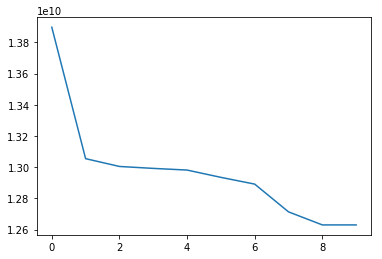

In [8]:
# Number of Clusters
K = 4

# Number of Iterations
Iter = 10

ClusterError, Centroids, Cluster = KMeans_Cluster(InputFaces,K,Iter)
plt.plot(range(0,Iter),ClusterError)

In [9]:
# Show the images
def pltimages(Centroid,Data):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

    ax1.axis('off')
    ax2.axis('off')
    
    ax1.set_title('Centroid')
    ax2.set_title('Image belong to Centroid Cluster')

    ax1.imshow(np.array(Centroid.reshape(243,160)),cmap='Greys_r')
    ax2.imshow(np.array(Data.reshape(243,160)),cmap='Greys_r')

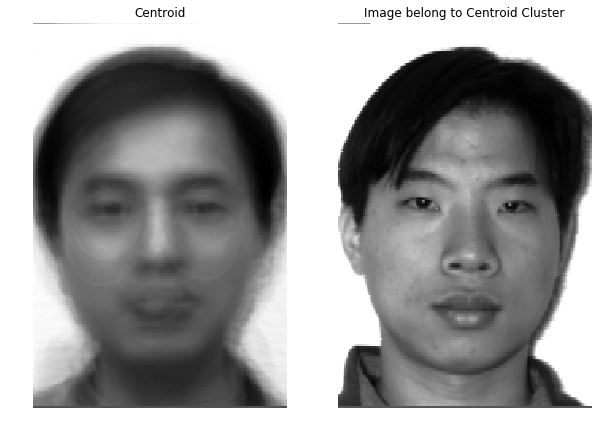

In [10]:
# Show Mean Images
a = InputFaces[Cluster == 0]
pltimages(Centroids[0],a[0])

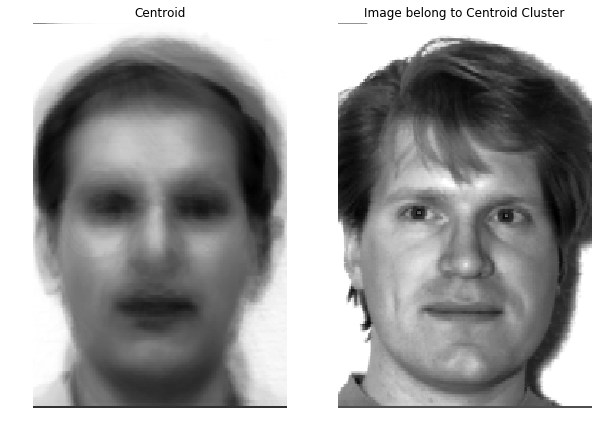

In [11]:
# Show Mean Images
a = InputFaces[Cluster == 1]
pltimages(Centroids[1],a[0])

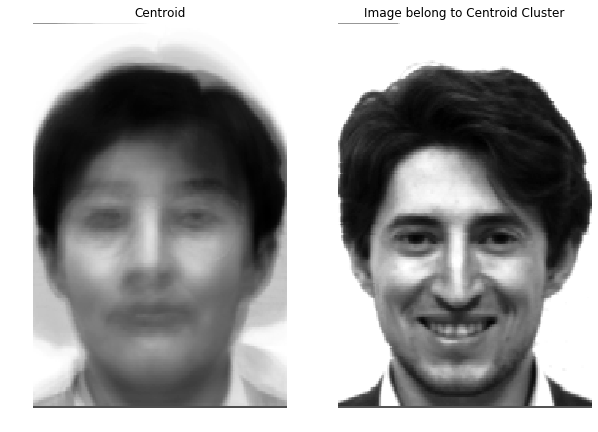

In [12]:
# Show Mean Images
a = InputFaces[Cluster == 2]
pltimages(Centroids[2],a[1])

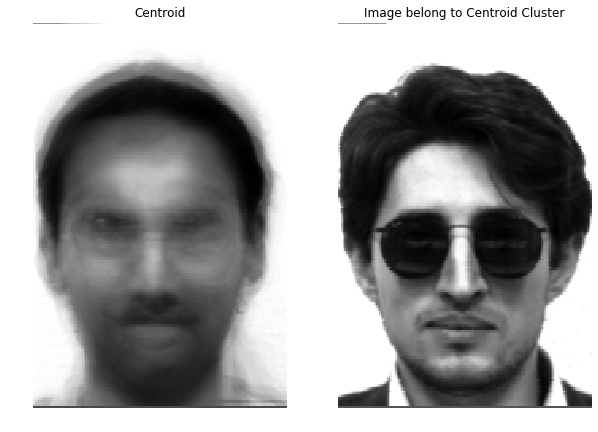

In [13]:
# Show Mean Images
a = InputFaces[Cluster == 3]
pltimages(Centroids[3],a[0])

Shape of Centroid : (1, 38880)
 K Value :  1 Loss :  170464863823.82358
Shape of Centroid : (2, 38880)
 K Value :  2 Loss :  142334614935.12405
Shape of Centroid : (3, 38880)
 K Value :  3 Loss :  133947212778.6391
Shape of Centroid : (4, 38880)
 K Value :  4 Loss :  129824300684.28278
Shape of Centroid : (5, 38880)
 K Value :  5 Loss :  106546929870.16924
Shape of Centroid : (6, 38880)
 K Value :  6 Loss :  105969378491.80096
Shape of Centroid : (7, 38880)
 K Value :  7 Loss :  94062835657.79987
Shape of Centroid : (8, 38880)
 K Value :  8 Loss :  97600365510.78201
Shape of Centroid : (9, 38880)


F:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
F:\Anaconda\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


 K Value :  9 Loss :  165122506158.62744
Shape of Centroid : (10, 38880)
 K Value :  10 Loss :  162891489288.58188


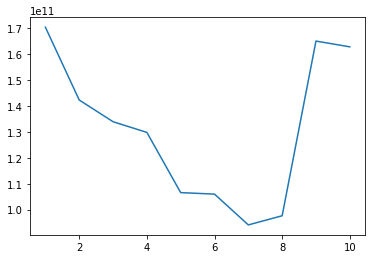

In [14]:
ErrorRate = np.zeros(Iter+1)
for i in range(1,Iter+1):
    Loss,Centroids, Cluster = KMeans_Cluster(InputFaces,i,Iter)
    ErrorRate[i] = np.sum(Loss)
    print(" K Value : ", i, "Loss : ", ErrorRate[i])
plt.plot(range(1,Iter+1),ErrorRate[1:])

In [15]:
# Reduce Data points from mean 
def normalize(dataset):
    mean_vector = np.mean(dataset, axis=0)
    dataset = dataset - mean_vector

    return dataset, mean_vector

In [16]:
# find the SVD of the input data
def findSvd(X,mean_vector,Features):
    u, s, vt = sla.svds(X, k=Features)
    s = np.flip(s)
    z = np.dot(X,vt.transpose())
    return z

In [17]:
InputFaces, mean_vector = normalize(InputFaces)
InputFaces_new =  findSvd(InputFaces,mean_vector,20)
print(InputFaces_new.shape)

(136, 20)


Shape of Centroid : (4, 20)


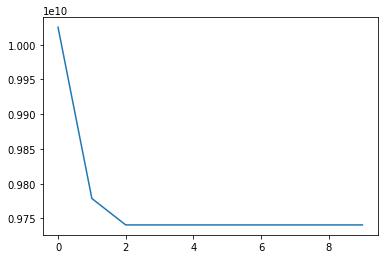

In [18]:
# Number of Clusters
K = 4

# Number of Iterations
Iter = 10

ClusterError, Centroids, Cluster = KMeans_Cluster(InputFaces_new,K,Iter)
plt.plot(range(0,Iter),ClusterError)

Shape of Centroid : (1, 20)
 K Value :  1 Loss :  144883175283.93405
Shape of Centroid : (2, 20)
 K Value :  2 Loss :  121498803303.18875
Shape of Centroid : (3, 20)
 K Value :  3 Loss :  103787309776.02177
Shape of Centroid : (4, 20)
 K Value :  4 Loss :  94938802501.46982
Shape of Centroid : (5, 20)
 K Value :  5 Loss :  91544732267.65808
Shape of Centroid : (6, 20)
 K Value :  6 Loss :  83866269278.88641
Shape of Centroid : (7, 20)
 K Value :  7 Loss :  69842493729.90192
Shape of Centroid : (8, 20)
 K Value :  8 Loss :  65978446957.21896
Shape of Centroid : (9, 20)
 K Value :  9 Loss :  63460469592.67201
Shape of Centroid : (10, 20)
 K Value :  10 Loss :  53153808754.23454


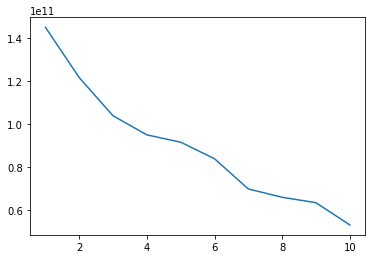

In [19]:
ErrorRate = np.zeros(Iter+1)
for i in range(1,Iter+1):
    Loss,Centroids, Cluster = KMeans_Cluster(InputFaces_new,i,Iter)
    ErrorRate[i] = np.sum(Loss)
    print(" K Value : ", i, "Loss : ", ErrorRate[i])
plt.plot(range(1,Iter+1),ErrorRate[1:])